# Classification on CIFAR 10 Dataset

Instructions - 
1. In order to kick start, code for setting up the dataframes has already been given (Step 1 to 5)
2. Go through the entire code written below and put the relavent comment for each line of code. Understanding below mentioned code is very important.
3. After commenting the code in step 1 to 5, complete step 6 and 7

### Step - 1 (Setup Code)

In [ ]:
# Run some setup code for this notebook.
import tarfile
import random
import numpy as np
import matplotlib.pyplot as plt
import os


from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform
# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Step - 2 (Download the dataset)

In [ ]:
# # Use this code to download the dataset for the first time
# # You will be required to install wget using pip
# # For Linux users checkout the alternative for 'del'

# !wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
# !tar -xzvf cifar-10-python.tar.gz
# !del cifar-10-python.tar.gz

In [ ]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2021-12-23 07:48:59--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  17.1MB/s    in 11s     

2021-12-23 07:49:11 (15.1 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [ ]:
!mkdir cifar

In [ ]:
!tar -xvf cifar-10-python.tar.gz --directory cifar

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [ ]:
tf = tarfile.open('cifar-10-python.tar.gz')

### Step - 3 (Load the Dataset)

In [ ]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def unpickle(file):
    '''Load byte data from file'''
    with open(file, 'rb') as f:
    data = pickle.load(f, encoding='latin-1')
    return data


def load_cifar10_data(data_dir):
    '''Return train_data, train_labels, test_data, test_labels
    The shape of data is 32 x 32 x3'''
    X_train = None
    y_train = []

    for i in range(1, 6):
        data_dic = unpickle(data_dir + "/data_batch_{}".format(i))
        if i == 1:
            X_train = data_dic['data']
        else:
            X_train = np.vstack((X_train, data_dic['data']))
            y_train += data_dic['labels']

    test_data_dic = unpickle(data_dir + "/test_batch")
    X_test = test_data_dic['data']
    y_test = test_data_dic['labels']

    X_train = X_train.reshape((len(X_train), 3, 32, 32))
    X_train = np.rollaxis(X_train, 1, 4)
    y_train = np.array(y_train)

    X_test = X_test.reshape((len(X_test), 3, 32, 32))
    X_test = np.rollaxis(X_test, 1, 4)
    y_test = np.array(y_test)

    return X_train, y_train, X_test, y_test

#data_dir = 'cifar-10-batches-py'
data_dir='cifar/cifar-10-batches-py'

X_train, y_train, X_test, y_test = load_cifar10_data(data_dir)

#print(X_train.shape)
#print(y_train.shape)

#print(X_test.shape)
#print(y_test.shape)

# In order to check where the data shows an image correctly
label_encoding = unpickle(data_dir + "/batches.meta")
label_encoding=label_encoding['label_names']
print(label_encoding[0])

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

airplane
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


### Step - 4 (Visualization)

Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

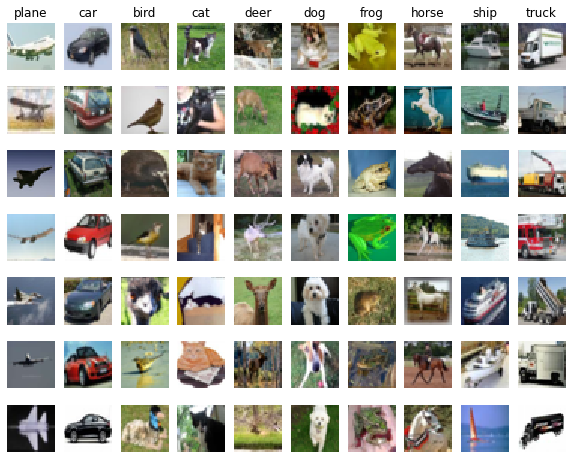

In [ ]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

### Step - 5 (Flattening the images)

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [ ]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


### Step - 6 (Apply all possible classification algorithms)

For each algo complete the following steps with appropriate plots, diagrams and code - 
1. Discuss the intuition behind each algorithm
2. Mention pros and cons
3. Discuss about Model parameters and Hyperparameters
4. Discuss about overfitting and underfitting with relavant plots and code (Hint: Use cross validation and plot hyperparameter vs accuracy score)
5. Discuss about train and test time/space complexities
6. Measure the performance of model using various metrics and write in detail about each metric

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.278


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.204


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.352


In [ ]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [ ]:
sv.score(X_test,y_test)

0.404

In [ ]:
from tensorflow import keras


In [ ]:
model = keras.Sequential([keras.layers.Dense(10,input_shape=(3072,),activation = 'sigmoid')])



model.compile( 
    optimizer = "adam",
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train,y_train, epochs = 30)

Epoch 1/30
157/157 [==============================] - 1s 3ms/step - loss: 148.3969 - accuracy: 0.2058
Epoch 2/30
157/157 [==============================] - 0s 3ms/step - loss: 95.4967 - accuracy: 0.2450
Epoch 3/30
157/157 [==============================] - 0s 3ms/step - loss: 81.1512 - accuracy: 0.2682
Epoch 4/30
157/157 [==============================] - 0s 2ms/step - loss: 88.2909 - accuracy: 0.2608
Epoch 5/30
157/157 [==============================] - 0s 2ms/step - loss: 84.9981 - accuracy: 0.2846
Epoch 6/30
157/157 [==============================] - 0s 3ms/step - loss: 79.7452 - accuracy: 0.2944
Epoch 7/30
157/157 [==============================] - 0s 3ms/step - loss: 90.0407 - accuracy: 0.2842
Epoch 8/30
157/157 [==============================] - 0s 3ms/step - loss: 74.6539 - accuracy: 0.3122
Epoch 9/30
157/157 [==============================] - 0s 3ms/step - loss: 67.5045 - accuracy: 0.3140
Epoch 10/30
157/157 [==============================] - 0s 3ms/step - loss: 72.0646 - accur

In [ ]:
model.evaluate(X_test,y_test)